# Blob behaviour analysis based on number of individuals on the environment

In the [original experiment](https://www.youtube.com/watch?v=YNMkADpvO4w&t=445s), blobs interact with food—and consequently with each other—in a synchronous manner: pairs of blobs are selected and automatically placed on a shared food item, which they compete over to gain energy.

Our simulation differs from the original in the following ways:

- A fixed amount of food is available in each round and remains constant throughout the simulation.  
- Blobs have the ability to search for food within the environment and will continue searching until they are full (i.e., they have accumulated enough energy to reproduce).

These changes can significantly affect the simulation. For example, a blob might fail to find any food or could end up competing with the same blob multiple times in a single round.

We conducted the experiments by running _N_ simulations, each consisting of _X_ rounds, while varying the number and type of blobs involved:

- Equal number of _Hawk_ and _Dove_ blobs (2 each)  
- Majority of _Hawk_ blobs (5 _Hawk_, 3 _Dove_)  
- Majority of _Dove_ blobs (5 _Dove_, 3 _Hawk_)



In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [17]:
folders = ['dove', 'hawk', 'samenum']
log_pattern = re.compile(r"\[(\d+)\] Round N°: (\d+) Hawk: (\d+) Dove: (\d+)")

In [18]:
records = []
for folder in folders:
    for filename in os.listdir(folder):
        if filename.startswith("run") and filename.endswith(".log"):
            path = os.path.join(folder, filename)
            with open(path, 'r') as file:
                for line in file:
                    match = log_pattern.match(line.strip())
                    if match:
                        timestamp, round_num, hawk, dove = match.groups()
                        dt = datetime.fromtimestamp(int(timestamp) / 1000)
                        records.append({
                            "Folder": folder,
                            "Round": int(round_num),
                            "Hawk": int(hawk),
                            "Dove": int(dove),
                            "Timestamp": dt
                        })



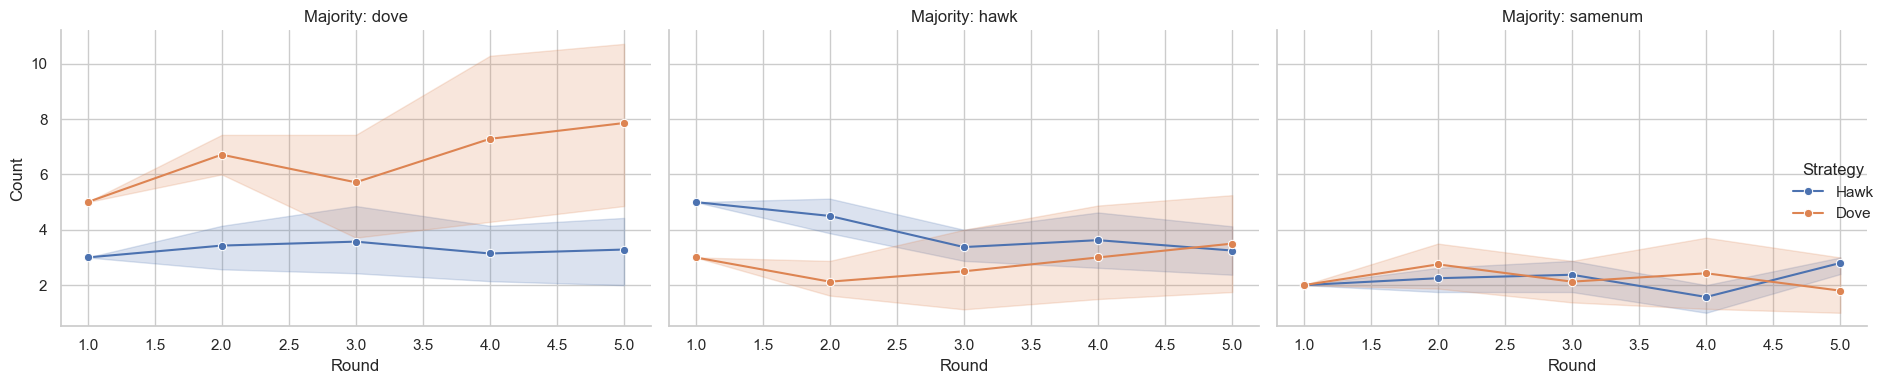

In [19]:
df = pd.DataFrame(records)

df_melted = df.melt(
    id_vars=["Folder", "Round", "Timestamp"],
    value_vars=["Hawk", "Dove"],
    var_name="Strategy",
    value_name="Count"
)

sns.set(style="whitegrid")

g = sns.FacetGrid(df_melted, col="Folder", hue="Strategy", sharey=True, height=4, aspect=1.5)
g.map(sns.lineplot, "Round", "Count", marker="o")
g.add_legend()
g.set_titles(col_template="Majority: {col_name}")
g.set_axis_labels("Round", "Count")
plt.tight_layout()
plt.show()